# MLCE 2023 Project

The aim of this project is to predict vapor pressures for many chemical species as a function of temperature and molecular descriptors. The data set is taken from our [MLCE book](https://edgarsmdn.github.io/MLCE_book/04_DNN_VLE.html) and the [RDKit toolkit](https://www.rdkit.org/docs/source/rdkit.html). Please use the data set in _Vapor_pressures_rdkit_reduced_trainall.xlsx_. The temperatures and pressures are given in K and kPa, respectively.

Collusion is not permitted. You have to solve the assignment on your own. You may use online sources for code as long as you provide the source.

Points will be given in 0.5P increments. Please provide the solutions to all tasks in the subsections to receive full points.

### **Deadline: 07. July 2023, 23:59**

#### 1a) Extract the data for _ethyl cyanoacetate_ from the data set. Plot vapor pressure as a function of temperature. **(1P)**

In [71]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

from tqdm.notebook import tqdm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor


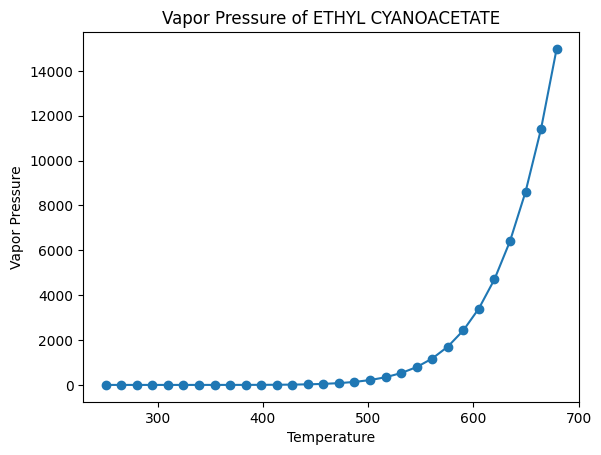

In [72]:
## Code - 1a
# Reading the CSV file or load the DataFrame
data = pd.read_csv("Vapor_pressures_rdkit_reduced_trainall_1.csv")

# Finding and extracting the required data (ethyl cyanoacetate) from a certain row to another row of dataset
start_row = 24720
end_row = 24749
Data = data.loc[start_row:end_row]

# Extracting temperature and vapor pressure columns from the Data DataFrame
temperature = Data['T']
vapor_pressure = Data['Pvap']

# Plotting the calculated data
plt.plot(temperature, vapor_pressure, 'o-')
plt.xlabel('Temperature')
plt.ylabel('Vapor Pressure')
plt.title('Vapor Pressure of ETHYL CYANOACETATE')

# Displaying the plot
plt.show()

#### 1b) Perform polynomial regression to predict the vapor pressure from temperature for _ethyl cyanoacetate_. Evaluate the prediction accuracy for varying degree of polynomial and plot the results. (1P)

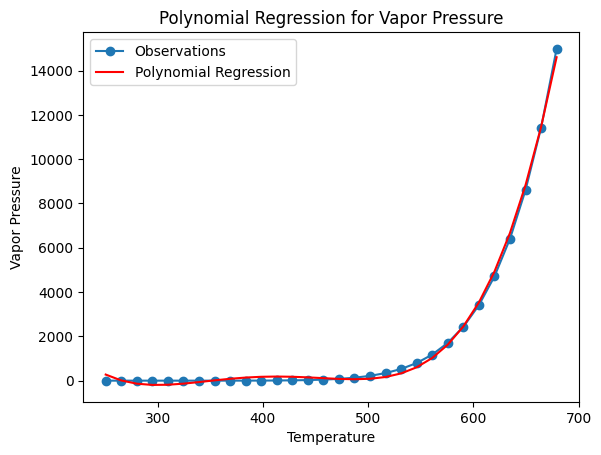

In [73]:
## Code - 1b (part - 1)

# Performing polynomial regression to predict the vapor pressure from temperature
degree = 4  # Degree of the polynomial is changed to test the plot
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(temperature.values.reshape(-1, 1))

# Fittting the polynomial regression model
model = LinearRegression()
model.fit(X_poly, vapor_pressure)

# Making the predictions
y_pred_poly = model.predict(X_poly)

# Plotting the evaluated results
plt.plot(temperature, vapor_pressure, 'o-', label='Observations')
plt.plot(temperature, y_pred_poly, color='r', label='Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Vapor Pressure')
plt.title('Polynomial Regression for Vapor Pressure')
plt.legend()
plt.show()

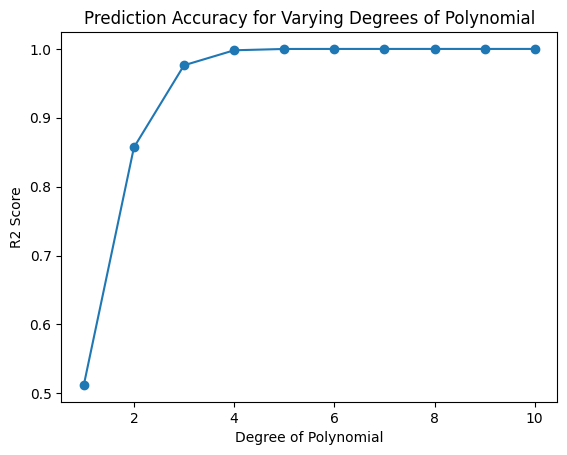

In [74]:
## Code - 1b (part - 2)

# Performimg polynomial regression and evaluating the accuracy of prediction
degrees = list(range(1,11))  # Changing the degrees of polynomials to test
r2_scores = []

for degree in degrees:
    # Transforming the features into polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(temperature.values.reshape(-1, 1))

    # Fitting the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, vapor_pressure)

    # Making predictions
    y_pred_poly = model.predict(X_poly)

    # Evaluating the prediction accuracy
    r2 = r2_score(vapor_pressure, y_pred_poly)
    r2_scores.append(r2)

# Plotting the polynomial regression results
plt.plot(degrees, r2_scores, 'o-')
plt.xlabel('Degree of Polynomial')
plt.ylabel('R2 Score')
plt.title('Prediction Accuracy for Varying Degrees of Polynomial')
plt.show()

#### 1c) Predict the vapor pressure of _ethyl cyanoacetate_ with Gaussian Processes trying at least two different kernels. Evaluate the prediction accuracy. Plot the mean (prediction) and standard deviation (uncertainty) of the final posterior. (1P)

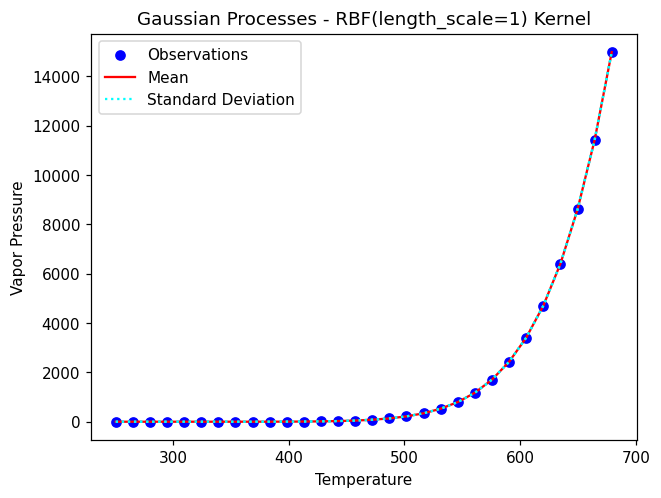

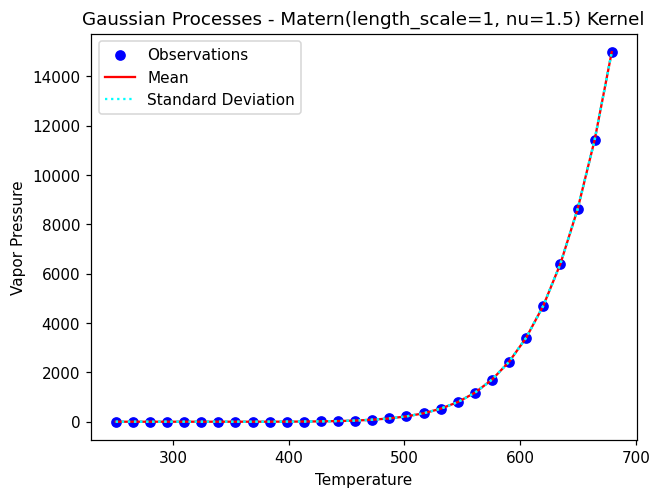

R2 Scores for Gaussian Processes:
RBF(length_scale=1) Kernel: 1.0
Matern(length_scale=1, nu=1.5) Kernel: 1.0


In [75]:
## Code 1c

# Task description
# Predicting the vapor pressure of ethyl cyanoacetate with Gaussian Processes trying at least two different kernels.
# Evaluating the prediction accuracy.
# Plotting the mean (prediction) and standard deviation (uncertainty) of the final posterior.

# Defining the kernels to try
kernels = [RBF(length_scale=1.0), Matern(length_scale=1.0)]

# Initializing lists to store R2 scores and mean/standard deviation arrays for plotting
gp_r2_scores = []
mean_arrays = []
std_arrays = []

# Performing Gaussian Processes regression for each kernel
for kernel in kernels:
    # Initializing Gaussian Process Regressor
    gp = GaussianProcessRegressor(kernel=kernel)

    # Fitting the Gaussian Process model
    gp.fit(temperature.values.reshape(-1, 1), vapor_pressure)

    # Making predictions with Gaussian Process
    y_pred_gp, sigma = gp.predict(temperature.values.reshape(-1, 1), return_std=True)

    # Evaluating the prediction accuracy
    r2_gp = r2_score(vapor_pressure, y_pred_gp)
    gp_r2_scores.append(r2_gp)

    # Storing the mean and standard deviation arrays for plotting
    mean_arrays.append(y_pred_gp)
    std_arrays.append(sigma)

    # Plotting the mean (prediction) and standard deviation (uncertainty) of the final posterior
    plt.figure(dpi=110)
    plt.scatter(temperature, vapor_pressure, color='b', label='Observations')
    plt.plot(temperature, y_pred_gp, color='r', label='Mean')
    plt.plot(temperature, y_pred_gp + sigma, color='cyan', linestyle='dotted', label='Standard Deviation') # This code makes standard deviation much more visible than the fill between
    plt.plot(temperature, y_pred_gp - sigma, color='cyan', linestyle='dotted')
    #plt.fill_between(temperature, y_pred_gp - sigma, y_pred_gp + sigma, color='green', alpha=0.9, label='Standard Deviation') #Another way to print standard deviation
    plt.xlabel('Temperature')
    plt.ylabel('Vapor Pressure')
    plt.title(f'Gaussian Processes - {kernel} Kernel')
    plt.legend()
    plt.show()

# Printing the R2 scores for the Gaussian Processes
print("R2 Scores for Gaussian Processes:")
for i, kernel in enumerate(kernels):
    print(f"{kernel} Kernel: {gp_r2_scores[i]}")

#### 2a) Now use the entire data set. Add _ln(P)_, the natural log of the vapor pressure _Pvap_, to the data set. Perform validation-testing-splitting based on the chemical species. Predict _ln(P)_ from temperature and the various molecular descriptors in the data set using KNN regression. (1P) Evaluate the prediction accuracy for varying number of neighbors and plot the results. (1P)

In [76]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic
from sklearn.neighbors import KNeighborsRegressor

from tqdm.notebook import tqdm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

In [77]:
## Task - 2a: Adding ln(P), the natural log of the vapor pressure Pvap, to the data set and performing validation-testing-splitting based on the chemical species.

#data_vp = pd.read_csv("https://raw.githubusercontent.com/tarunsai978/tarunsai978/main/Vapor_pressures_rdkit_reduced_trainall_1.csv")
data_vp = pd.read_csv("Vapor_pressures_rdkit_reduced_trainall_1.csv")

# Adding ln(P), the natural log of the vapor pressure Pvap, to the data set data_vp
data_vp['lnP'] = np.log(data_vp['Pvap'])

# Performing validation-testing-splitting based on the chemical species
# List of column names to drop
columns_to_drop = ['Class', 'Subclass', 'mol']

# Dropping the specified columns
data_vp = data_vp.drop(columns=columns_to_drop)

# Splitting the data based on chemical species
train_data = pd.DataFrame()      # Data for training
val_data = pd.DataFrame()        # Data for validation
test_data = pd.DataFrame()       # Data for testing

# Obtaining unique chemical species
unique_species = data_vp['Name'].unique()

# Splitting the data for each species
for species in unique_species:
    species_data = data_vp[data_vp['Name'] == species]
    train_species, test_species = train_test_split(species_data, test_size=0.2, random_state=42)
    train_species, val_species = train_test_split(train_species, test_size=0.2, random_state=42)

    train_data = pd.concat([train_data, train_species])
    val_data = pd.concat([val_data, val_species])
    test_data = pd.concat([test_data, test_species])

# Verifying the distribution of species in each set
print("Training data species distribution:")
print(train_data['Name'].value_counts())
print()
print("Validation data species distribution:")
print(val_data['Name'].value_counts())
print()
print("Testing data species distribution:")
print(test_data['Name'].value_counts())


Training data species distribution:
METHANE                 19
HEXAMETHYLENEDIAMINE    19
PYRROLE                 19
PYRAZINE                19
HEXAMETHYLENEIMINE      19
                        ..
FLUORANTHENE            19
PYRENE                  19
1-PHENYLNAPHTHALENE     19
BENZANTHRACENE          19
CARBON DIOXIDE          19
Name: Name, Length: 1104, dtype: int64

Validation data species distribution:
METHANE                 5
HEXAMETHYLENEDIAMINE    5
PYRROLE                 5
PYRAZINE                5
HEXAMETHYLENEIMINE      5
                       ..
FLUORANTHENE            5
PYRENE                  5
1-PHENYLNAPHTHALENE     5
BENZANTHRACENE          5
CARBON DIOXIDE          5
Name: Name, Length: 1104, dtype: int64

Testing data species distribution:
METHANE                 6
HEXAMETHYLENEDIAMINE    6
PYRROLE                 6
PYRAZINE                6
HEXAMETHYLENEIMINE      6
                       ..
FLUORANTHENE            6
PYRENE                  6
1-PHENYLNAPHTHALENE 

Number of Neighbors: 1
Mean Squared Error: 0.49364145874205445
R-squared Score: 0.9723177206840372

Number of Neighbors: 2
Mean Squared Error: 0.37091587830885187
R-squared Score: 0.9791998893848245

Number of Neighbors: 3
Mean Squared Error: 0.5107847440833787
R-squared Score: 0.9713563646131328

Number of Neighbors: 4
Mean Squared Error: 0.6281043404257973
R-squared Score: 0.9647773510848466

Number of Neighbors: 5
Mean Squared Error: 0.7911704321820839
R-squared Score: 0.9556329791545329

Number of Neighbors: 6
Mean Squared Error: 0.9460518553765382
R-squared Score: 0.9469475846403678

Number of Neighbors: 7
Mean Squared Error: 1.092971861751915
R-squared Score: 0.9387086480973345

Number of Neighbors: 8
Mean Squared Error: 1.2465306755067018
R-squared Score: 0.9300974224830589

Number of Neighbors: 9
Mean Squared Error: 1.4108118137248866
R-squared Score: 0.9208849135376211

Number of Neighbors: 10
Mean Squared Error: 1.6007547260500214
R-squared Score: 0.9102333512347488

Number o

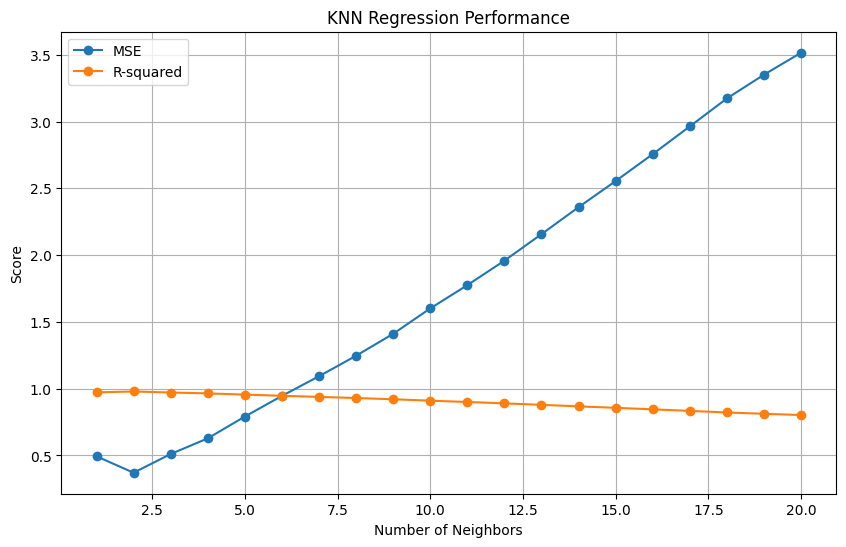

In [78]:
## Predicting ln(P) from temperature and the various molecular descriptors in the data set using KNN regression and evaluating the prediction accuracy for varying number of neighbors and plotting the results.

# Selecting the features (descriptors) and target variable
descriptor_columns = data_vp.columns[4:-1]
features = descriptor_columns.tolist()
target = 'lnP'

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_vp[features], data_vp[target], test_size=0.2, random_state=42)

# Standardizing the feature matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the range of neighbors to evaluate
neighbors_range = range(1, 21)
mse_scores = []
r2_scores = []

# Performing KNN regression for each number of neighbors
for n_neighbors in neighbors_range:
    # Creating and train the KNN regression model
    knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_reg.fit(X_train_scaled, y_train)

    # Predicting ln(P) for the test set
    y_pred = knn_reg.predict(X_test_scaled)

    # Calculating the mean squared error (MSE) and R-squared score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_scores.append(mse)
    r2_scores.append(r2)

    print("Number of Neighbors:", n_neighbors)
    print("Mean Squared Error:", mse)
    print("R-squared Score:", r2)
    print()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, mse_scores, marker='o', label='MSE')
plt.plot(neighbors_range, r2_scores, marker='o', label='R-squared')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.title('KNN Regression Performance')
plt.legend()
plt.grid(True)
plt.show()

#### 2b) Perform feature selection with one filter method and one wrapper method with a model of your choice for the prediction of _ln(P)_ from temperature and molecular descriptors. Determine the most important features with both methods. (1P)

In [ ]:
## Task - 2b: Performing feature selection with one filter method and one wrapper method with a model of my choice for the prediction of ln(P) from temperature and molecular descriptors and determining the most important features with both methods.

# Selecting the features (descriptors) and target variable
descriptor_columns = data_vp.columns[4:-1]  # Assuming the descriptors start from column index 4
features = ['T'] + descriptor_columns.tolist()
target = 'lnP'

# Filtering out non-numeric values in the descriptor columns
# numeric_mask = data_vp[descriptor_columns].apply(pd.to_numeric, errors='coerce').notnull().all(axis=1)
# data_vp = data_vp[numeric_mask]

# Creating the feature matrix X and target vector y
X = data_vp[features]
y = data_vp[target]

# Checking whether there are enough samples for feature selection
if len(X) < 2:
    print("Insufficient samples for feature selection.")
else:
    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardizing the feature matrix
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Filter Method - SelectKBest with f_regression
    selector_filter = SelectKBest(score_func=f_regression, k=5)
    X_train_filtered = selector_filter.fit_transform(X_train_scaled, y_train)

    # Wrapper Method - Recursive Feature Elimination (RFE) with LinearRegression
    estimator = LinearRegression()
    selector_wrapper = RFECV(estimator, step=6, cv=5)
    X_train_wrapped = selector_wrapper.fit_transform(X_train_scaled, y_train)

    # Getting the selected features from both methods
    selected_features_filter = X.columns[selector_filter.get_support()]
    selected_features_wrapper = X.columns[selector_wrapper.support_]

    # Printing the most important features from the both methods
    print("Selected features using Filter Method (SelectKBest with f_regression):")
    print(selected_features_filter)
    print()

    print("Selected features using Wrapper Method (Recursive Feature Elimination with LinearRegression):")
    print(selected_features_wrapper)
    print()


Step Size: 1
Cross-validated Mean Squared Error: 3.6218481523150805
Cross-validated R-squared Score: 0.798139749291068

Step Size: 2
Cross-validated Mean Squared Error: 3.6207919013867818
Cross-validated R-squared Score: 0.7981956069693927

Step Size: 3
Cross-validated Mean Squared Error: 3.6212161383603894
Cross-validated R-squared Score: 0.7981746627651851

Step Size: 4
Cross-validated Mean Squared Error: 3.6209166895111835
Cross-validated R-squared Score: 0.7981942177737534

Step Size: 5
Cross-validated Mean Squared Error: 3.6214223102530476
Cross-validated R-squared Score: 0.7981614552635338

Step Size: 6
Cross-validated Mean Squared Error: 3.6199262235428527
Cross-validated R-squared Score: 0.7982465030296182

Step Size: 7
Cross-validated Mean Squared Error: 3.622203652814945
Cross-validated R-squared Score: 0.7981206180019916

Step Size: 8
Cross-validated Mean Squared Error: 3.6205202038506528
Cross-validated R-squared Score: 0.7982134781253494

Step Size: 9
Cross-validated Mean 

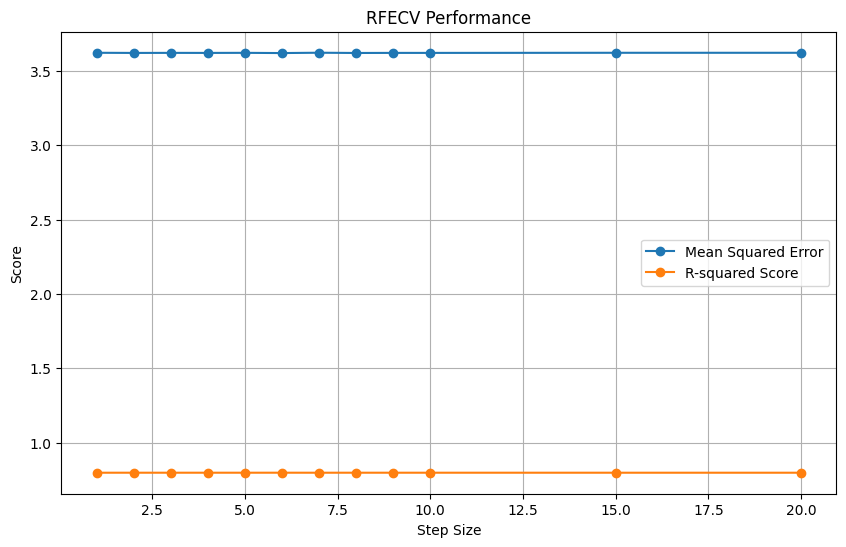

In [79]:
## To detemine RFECV Performance (It is not required in the task but calculated for my usage)

# Reading the data
data1 = data_vp

# Defining features and target
features = data1.iloc[:, 4:-1]  # Assuming the descriptors start from column index 4
target = np.log(data1['Pvap'])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardizing the feature matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the estimator
estimator = LinearRegression()

# Defining the range of step sizes to evaluate
step_sizes = [1,2,3,4, 5,6,7,8,9, 10, 15, 20]

# Performing feature selection with different step sizes and evaluate performance
mse_scores = []
r2_scores = []

for step_size in step_sizes:
    selector = RFECV(estimator, step=step_size, cv=5)
    selector.fit(X_train_scaled, y_train)
    X_train_selected = selector.transform(X_train_scaled)

    # Performing cross-validation on the selected features
    cv_scores = cross_val_score(estimator, X_train_selected, y_train, cv=5, scoring=make_scorer(mean_squared_error))
    avg_mse_score = np.mean(cv_scores)
    avg_r2_score = np.mean(cross_val_score(estimator, X_train_selected, y_train, cv=5, scoring='r2'))

    mse_scores.append(avg_mse_score)
    r2_scores.append(avg_r2_score)

    print("Step Size:", step_size)
    print("Cross-validated Mean Squared Error:", avg_mse_score)
    print("Cross-validated R-squared Score:", avg_r2_score)
    print()

# Plotting the performance metrics against the step sizes
plt.figure(figsize=(10, 6))
plt.plot(step_sizes, mse_scores, marker='o', label='Mean Squared Error')
plt.plot(step_sizes, r2_scores, marker='o', label='R-squared Score')
plt.xlabel('Step Size')
plt.ylabel('Score')
plt.title('RFECV Performance')
plt.legend()
plt.grid(True)
plt.show()


#### 3a) Predict _ln(P)_ using an ANN. Show training and validation error throughout training (1P).

In [80]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFECV

from tqdm.notebook import tqdm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [81]:
# Preprocessing the data to execute these tasks

#data_vp = pd.read_csv("https://raw.githubusercontent.com/tarunsai978/tarunsai978/main/Vapor_pressures_rdkit_reduced_trainall_1.csv")
data_vp = pd.read_csv("Vapor_pressures_rdkit_reduced_trainall_1.csv")

# Adding ln(P), the natural log of the vapor pressure Pvap, to the data set data_vp
data_vp['lnP'] = np.log(data_vp['Pvap'])

# Performing validation-testing-splitting based on the chemical species
# List of column names to drop
columns_to_drop = ['Class', 'Subclass', 'mol']

# Dropping the specified columns
data_vp = data_vp.drop(columns=columns_to_drop)

# Creating a LabelEncoder object
label_encoder = LabelEncoder()

# Encoding the 'Name' column
data_vp['Name'] = label_encoder.fit_transform(data_vp['Name'])

# Removing the columns with names
data_vp = data_vp.drop(columns=['CAS-RN', 'Formula', 'SMILES'])

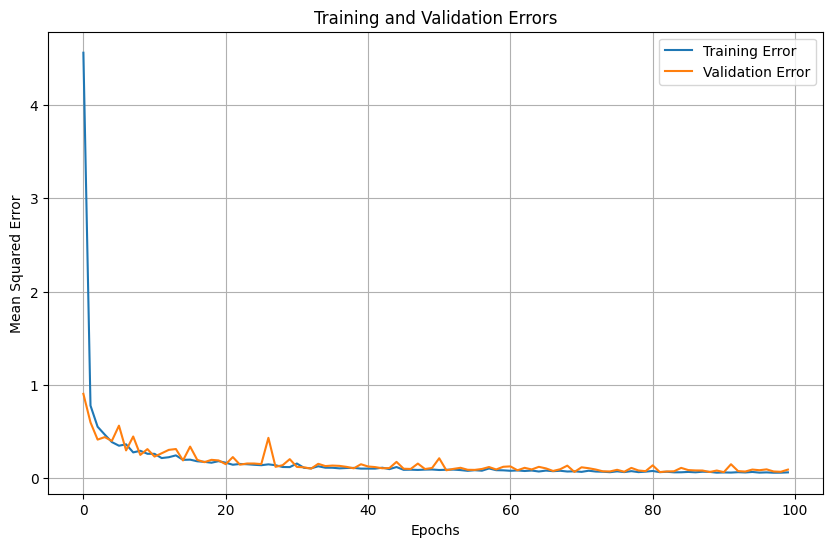

In [82]:
# Splitting the data into features and target variable
features = data_vp.drop('lnP', axis=1)
target = data_vp['lnP']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardizing the feature matrices
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Defining the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, batch_size=32, verbose=0)

# Plotting the training and validation errors
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Error')
plt.plot(history.history['val_loss'], label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Errors')
plt.legend()
plt.grid(True)
plt.show()

#### 3b) Perform hyperparameter selection for the ANN and optimize its performance. (1P) Indicate clearly your final model. (1P for highest performing models)

In [69]:
# Loading the data
data_vp = pd.read_csv("Vapor_pressures_rdkit_reduced_trainall_1.csv")

# Adding ln(P), the natural log of the vapor pressure Pvap, to the data set data_vp
data_vp['lnP'] = np.log(data_vp['Pvap'])

# List of column names that need to be dropped
columns_to_drop = ['Class', 'Subclass', 'mol','CAS-RN', 'Formula', 'SMILES','Name']

# Dropping the specified columns
data_vp = data_vp.drop(columns=columns_to_drop)

# Splitting the data into features and target variable
features = data_vp.drop('lnP', axis=1)
target = data_vp['lnP']

# Splitting the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Standardizing the feature matrices
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Defining a function to create the ANN model with given hyperparameters
def create_model(hidden_units=64):
    model = Sequential()
    model.add(Dense(hidden_units, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Defining a function to evaluate the model with given hyperparameters
def evaluate_model(hidden_units):
    model = create_model(hidden_units)
    history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, batch_size=32, verbose=0)
    val_loss = history.history['val_loss'][-1]
    return val_loss

# Defining the hyperparameters to search
hidden_units_range = [32, 64, 128, 256]
best_val_loss = float('inf')
best_hidden_units = None

# Iterating through the hyperparameters and evaluating the models
for hidden_units in hidden_units_range:
    val_loss = evaluate_model(hidden_units)
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_hidden_units = hidden_units

# Creating the final model with the best hyperparameters
final_model = create_model(best_hidden_units)

# Training the final model on the combined training and validation sets
final_model.fit(np.concatenate((X_train_scaled, X_val_scaled)), np.concatenate((y_train, y_val)), epochs=100, batch_size=32, verbose=0)

# Evaluating the final model on the test set
test_loss = final_model.evaluate(X_test_scaled, y_test)

# Printing the best hyperparameters and the test loss
print("Best Hidden Units:", best_hidden_units)
print("Test Loss:", test_loss)


207/207 [==============================] - 0s 1ms/step - loss: 0.0648
Best Hidden Units: 128
Test Loss: 0.06476888060569763


#### 4) Perform PCA for the input features; select the PCs which explain 90% of the variance and state the number of components required. Then perform linear regression using the PCs. Evaluate the performance for varying number of PCs. Compare with linear regression on the original data set with and without feature selection, explain and interpret the results. (1P)

Number of components required: 39
Number of components explaining 90% variance: 39
Validation MSE with PCA: 8.850407221976257
Validation R^2 with PCA: 0.5203493411496278



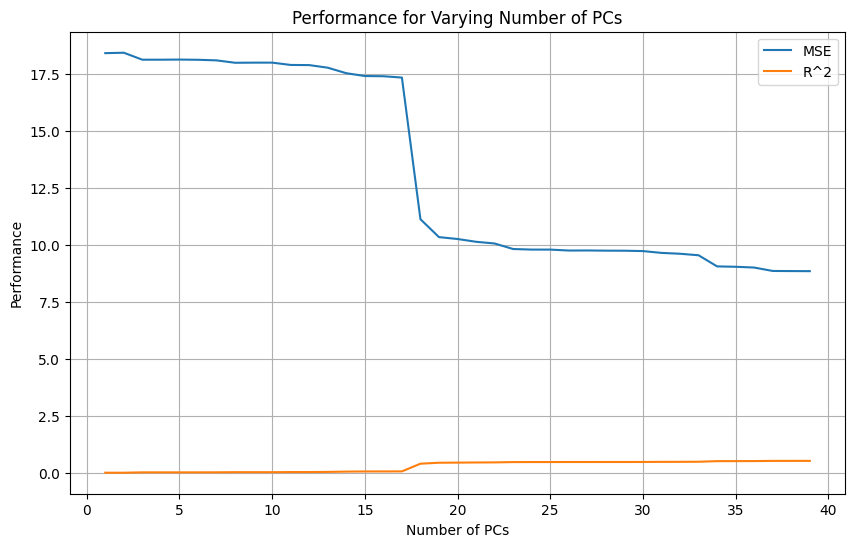

Validation MSE without feature selection: 3.7491201971900785
Validation R^2 without feature selection: 0.7968152280918535

Validation MSE with feature selection (RFECV): 3.747499046071556
Validation R^2 with feature selection (RFECV): 0.7969030868968319


In [83]:
## Task - 4
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

from tqdm.notebook import tqdm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Loading the dataset
data_vp = pd.read_csv("Vapor_pressures_rdkit_reduced_trainall_1.csv")

# Adding ln(P), the natural log of the vapor pressure Pvap, to the data set data_vp
data_vp['lnP'] = np.log(data_vp['Pvap'])

# Dropping unnecessary columns
columns_to_drop = ['Class', 'Subclass', 'mol', 'CAS-RN', 'Formula', 'SMILES']
data_vp = data_vp.drop(columns=columns_to_drop)

# Encoding the 'Name' column
label_encoder = LabelEncoder()
data_vp['Name'] = label_encoder.fit_transform(data_vp['Name'])

# Splitting the data into features and target variable
features = data_vp.drop('lnP', axis=1)
target = data_vp['lnP']

# Splitting the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardizing the feature matrices
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Performing PCA on the input features
pca = PCA(n_components=0.9)  # Keep components explaining 90% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Number of components required
num_components = X_train_pca.shape[1]
print("Number of components required:", num_components)

# Linear regression using the PCs
regressor = LinearRegression()
regressor.fit(X_train_pca, y_train)

# Predicting on the validation set using the model with PCs
y_val_pred = regressor.predict(X_val_pca)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Evaluating performance for varying number of PCs
num_pcs = range(1, num_components + 1)
mse_scores = []
r2_scores = []

for n in num_pcs:
    regressor = LinearRegression()
    regressor.fit(X_train_pca[:, :n], y_train)
    y_val_pred = regressor.predict(X_val_pca[:, :n])
    mse_scores.append(mean_squared_error(y_val, y_val_pred))
    r2_scores.append(r2_score(y_val, y_val_pred))

# Linear regression on the original dataset without feature selection
regressor_full = LinearRegression()
regressor_full.fit(X_train_scaled, y_train)
y_val_pred_full = regressor_full.predict(X_val_scaled)
val_mse_full = mean_squared_error(y_val, y_val_pred_full)
val_r2_full = r2_score(y_val, y_val_pred_full)

# Linear regression on the original dataset with feature selection using RFECV
selector = RFECV(estimator=LinearRegression())
selector.fit(X_train_scaled, y_train)
X_train_selected = selector.transform(X_train_scaled)
X_val_selected = selector.transform(X_val_scaled)
regressor_selected = LinearRegression()
regressor_selected.fit(X_train_selected, y_train)
y_val_pred_selected = regressor_selected.predict(X_val_selected)
val_mse_selected = mean_squared_error(y_val, y_val_pred_selected)
val_r2_selected = r2_score(y_val, y_val_pred_selected)

# Printing the results
print("Number of components explaining 90% variance:", num_components)
print("Validation MSE with PCA:", val_mse)
print("Validation R^2 with PCA:", val_r2)
print("")

# Plotting the performance for varying number of PCs
plt.figure(figsize=(10, 6))
plt.plot(num_pcs, mse_scores, label='MSE')
plt.plot(num_pcs, r2_scores, label='R^2')
plt.xlabel('Number of PCs')
plt.ylabel('Performance')
plt.title('Performance for Varying Number of PCs')
plt.legend()
plt.grid(True)
plt.show()

# Comparing linear regression on the original data with and without feature selection
print("Validation MSE without feature selection:", val_mse_full)
print("Validation R^2 without feature selection:", val_r2_full)
print("")
print("Validation MSE with feature selection (RFECV):", val_mse_selected)
print("Validation R^2 with feature selection (RFECV):", val_r2_selected)


### References

#### _Insert the sources you used here._

Lectures, tutorials, and references from the course "Machine Learning in Chemical Engineering" by Dr. Caroline Ganzer and Mr. Sahil Sethi (https://elearning.ovgu.de/course/view.php?id=7311).